In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

In [2]:
from google.colab import files
uploaded = files.upload()

Saving gill_attachment.png to gill_attachment (3).png
Saving Mushroom_Diagram.jpg to Mushroom_Diagram (3).jpg
Saving mushrooms.csv to mushrooms (3).csv


In [3]:
# 1-1) Checking Dtype by columns
df = pd.read_csv("mushrooms.csv")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
# 1-1) Check basic statistics by Using describe()
print(df.describe())

       class cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count   8124      8124        8124      8124    8124  8124            8124   
unique     2         6           4        10       2     9               2   
top        e         x           y         n       f     n               f   
freq    4208      3656        3244      2284    4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top    

### type(df)
- 가장 일반적인 방식
- type() 함수는 인자로 전달된 객체의 자료형 반환
- DataFrame 형식임을 출력하고 있음

### df.__class__
- 객체 내부 속성인 __class__를 직접 참조하여 타입 확인
- type(df)와 같은 결과 반환

In [5]:
#1-1)Check the data type of the DataFrame loaded from the CSV file
# 모두 df 변수의 type을 출력하는 방법이지만 문법을 각기 다르게 하여 여러가지 방법을 보여줌
print('df 변수 type:\n' ,type(df) )
print('df 변수 type:\n' ,df.__class__ )

df 변수 type:
 <class 'pandas.core.frame.DataFrame'>
df 변수 type:
 <class 'pandas.core.frame.DataFrame'>


In [6]:
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [7]:
# 1-2) Add a new column arbitrarily in DataFrame and assign a zero or any value
# df['test_col'] = 0
df['test_col'] = np.zeros(len(df))
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,test_col
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,0.0
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,0.0
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,0.0
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,0.0
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,0.0
5,e,x,y,y,t,a,f,c,b,n,...,w,w,p,w,o,p,k,n,g,0.0
6,e,b,s,w,t,a,f,c,b,g,...,w,w,p,w,o,p,k,n,m,0.0
7,e,b,y,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,s,m,0.0
8,p,x,y,w,t,p,f,c,n,p,...,w,w,p,w,o,p,k,v,g,0.0
9,e,b,s,y,t,a,f,c,b,g,...,w,w,p,w,o,p,k,s,m,0.0


In [8]:
df['test_col'] = 1114
df.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,test_col
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,1114
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,1114
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,1114
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,1114
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,1114
5,e,x,y,y,t,a,f,c,b,n,...,w,w,p,w,o,p,k,n,g,1114
6,e,b,s,w,t,a,f,c,b,g,...,w,w,p,w,o,p,k,n,m,1114
7,e,b,y,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,s,m,1114
8,p,x,y,w,t,p,f,c,n,p,...,w,w,p,w,o,p,k,v,g,1114
9,e,b,s,y,t,a,f,c,b,g,...,w,w,p,w,o,p,k,s,m,1114


In [9]:
# 1-3) Delete new col ("test_col") by using drop()
df.drop(labels=['test_col'], axis=1, inplace=True)
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


In [10]:
#1-4) 조건 부여 ('odor값이 f인 칼럼 불러오기')후 데이터 프레임 다시 추출
df[df['odor'] == 'f']

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1816,p,x,f,g,f,f,f,c,b,h,...,k,n,b,p,w,o,l,h,y,g
2128,p,x,f,g,f,f,f,c,b,p,...,k,b,b,p,w,o,l,h,y,g
2178,p,x,f,g,f,f,f,c,b,p,...,k,n,p,p,w,o,l,h,y,d
2238,p,x,f,g,f,f,f,c,b,g,...,k,b,p,p,w,o,l,h,y,p
2385,p,x,f,g,f,f,f,c,b,h,...,k,n,n,p,w,o,l,h,y,d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8087,p,x,s,e,f,f,f,c,n,b,...,s,w,p,p,w,o,e,w,v,p
8089,p,k,y,e,f,f,f,c,n,b,...,k,w,p,p,w,o,e,w,v,d
8090,p,k,s,n,f,f,f,c,n,b,...,s,p,p,p,w,o,e,w,v,d
8091,p,k,y,e,f,f,f,c,n,b,...,k,w,w,p,w,o,e,w,v,p


In [11]:
# 1-4, 1-5) 데이터 셀렉션을 통해 조건을 설정해서 DF 다시 추출해보기
df.iloc[0:4]

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u


In [12]:
df.iloc[3, 1:4] # 4th row and 1:4 columns

,3
cap-shape,x
cap-surface,y
cap-color,w


In [13]:
# loc[]은 인덱스가 문자열이어야 함. 따라서 0:2 이런식으로 정수형 인덱스를 입력하면
# 행 슬라이싱은 무시되고, 열 슬라이싱만 적용되어 전체 행의 일부 열만 반환된 것임.
df.loc["0":"2", "cap-shape":"odor"]

,cap-shape,cap-surface,cap-color,bruises,odor
0,x,s,n,t,p
1,x,s,y,t,a
2,b,s,w,t,l
3,x,y,w,t,p
4,x,s,g,f,n
...,...,...,...,...,...
1995,x,f,n,t,n
1996,f,s,n,f,n
1997,f,f,n,f,n
1998,x,s,n,f,n


In [14]:
# 1-6) 데이터 프레임 정렬해보기
# 해당 코드는 population Column을 정렬한 것
df.sort_values(by=['population'])

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
1676,e,x,s,w,f,n,f,w,b,n,...,s,w,w,p,w,o,e,k,a,g
1245,e,x,f,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,k,a,g
1246,e,f,s,g,f,n,f,w,b,h,...,s,w,w,p,w,o,e,n,a,g
1247,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,k,a,g
1248,e,f,f,g,f,n,f,w,b,n,...,s,w,w,p,w,o,e,k,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3736,e,f,y,n,t,n,f,c,b,p,...,s,w,w,p,w,o,p,n,y,d
3735,e,f,y,e,t,n,f,c,b,w,...,s,p,p,p,w,o,p,n,y,d
3734,p,x,y,g,f,f,f,c,b,h,...,k,n,n,p,w,o,l,h,y,g
3755,p,x,f,g,f,f,f,c,b,h,...,k,p,b,p,w,o,l,h,y,g


In [15]:
# 1-7) 결손 데이터 처리해보기.
## 결측 데이터는 '?' 로 설정되어있음 -> 해당 데이터를 Nan으로 바꾼뒤 결측값 처리해보자
df = df.replace("?", np.nan)
print(df.isnull().sum())

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


In [16]:
df = df.drop(labels=['stalk-root'], axis=1)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


# Apply Lambda 사용해보기
- 문자열 기반 처리 해보기

In [17]:
#람다 이용하기('count'라는 새 컬럼을 만들고 하나의 열 안에 문자 'd'가 몇 번 나오는지 세기)
df['count'] = df['habitat'].apply(lambda x: str(x).count('d'))
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,count
0,p,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,0
1,e,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,0
2,e,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,0
3,p,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,0
4,e,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,0


In [29]:
#람다 이용하기 ('class' 값 기준으로 식용 가능 여부 0과 1로 구분)
df['is_edible'] = df['class'].apply(lambda x: 1 if x == 'e' else 0)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,is_edible
0,1,x,s,n,t,p,f,c,n,k,e,s,s,w,w,0
1,0,x,s,y,t,a,f,c,b,k,e,s,s,w,w,0
2,0,b,s,w,t,l,f,c,b,n,e,s,s,w,w,0
3,1,x,y,w,t,p,f,c,n,n,e,s,s,w,w,0
4,0,x,s,g,f,n,f,w,b,k,t,s,s,w,w,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,e,s,s,o,o,0
8120,0,x,s,n,f,n,a,c,b,y,e,s,s,o,o,0
8121,0,f,s,n,f,n,a,c,b,n,e,s,s,o,o,0
8122,1,k,y,n,f,y,f,c,n,b,t,s,k,w,w,0


# 2. 분류 데이터 사용할 수 있게 가공해보기
1. 독립 변수, 종속 변수 결정하기
2. 독립 변수, 종속 변수로 쓰지 않을 컬럼들은 Drop하기
3. 결손값 처리해보기
4. 새로운 DataFrame에 저장해보기
5. 새로운 DataFrame을 종속변수 (Y, Target)과 독립변수 (X, Feature)로 나누어 각각 저장하기 [목표 : 종속 변수]
[feature : 독립변수]
## Column별 데이터 설명
- class : 식용(e) / 독(p)
- cap-shape : 버섯 머리 모양
- cap-surface : 버섯 머리 표면 (섬유, 비닐처럼 뒤덮힌..., 물결모양)
- cap-color : 버섯 머리 색
- bruises : 멍..?
- odor : 냄새 (nutty한 냄새인지, 비린내, 톡쏘는 냄새 등)
- gill-attachment : 버섯의 아가미 (버섯 머리 밑부분) [ 참고 사진 밑에 첨부 ]
- gill-spacing & gill-size : 각 버섯 아가미의 밀도와 사이즈
- gill-color : 버섯 아가미의 색


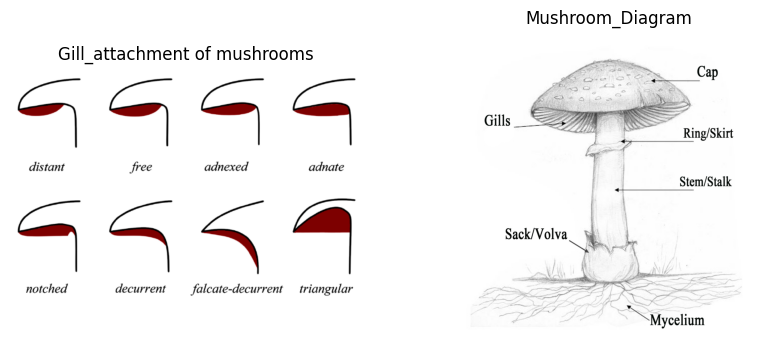

In [19]:
img1 = cv2.imread('gill_attachment.png')
img2 = cv2.imread('Mushroom_Diagram.jpg')

fig = plt.figure(figsize=(10, 4))
rows=1
cols=2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
ax1.set_title("Gill_attachment of mushrooms")
ax1.axis("off")

ax2 = fig.add_subplot(rows, cols, 2)
ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
ax2.set_title("Mushroom_Diagram")
ax2.axis("off")

plt.show()

## 2-1) 목표 변수 및 독립 변수 설정하기
해당 분류 모델은 버섯이 독버섯인지, 식용인지 구별하는 것.
- 따라서 목표 변수는 class column으로 정한다.
- 그 외  col은 독립변수로 설정



## EDA
독성과 버섯의 냄새(odor)가 강한 상관성이 있다는 가설을 세우고, 해당 가설을 검증해보자

In [20]:
pd.crosstab(df['class'], df['odor'])
# almond 냄새 -> edible(400)
# none -> edible(3408)
# foul 냄새 -> posion(2160)
# fishy & spicy -> poison (576 for each)

odor,a,c,f,l,m,n,p,s,y
class,,,,,,,,,
e,400,0,0,400,0,3408,0,0,0
p,0,192,2160,0,36,120,256,576,576


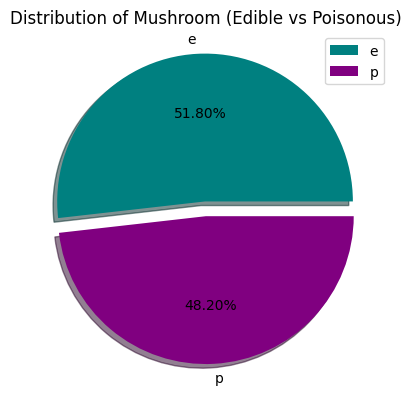

In [21]:
# 만약 독성과 식용의 비율이 크게 차이가 날 경우, 분류에 편향이 생길 가능성이 있음
mushroom_edible = df['class'].value_counts()
plt.figure()
plt.pie(mushroom_edible.values, labels=mushroom_edible.index, autopct='%.2f%%',
        colors=['teal', 'purple'], explode = [0.1, 0], shadow=True)
plt.title("Distribution of Mushroom (Edible vs Poisonous)")
plt.legend()
plt.show()

## EDA-2 : Correlations between veil and mushrooms' poisonous

In [22]:
pd.crosstab(df['class'], df['gill-spacing'])

gill-spacing,c,w
class,,
e,3008,1200
p,3804,112


In [23]:
# Target Encoding
# df['class'] = df['class'].map({'e' : 0, 'p' : 1}).astype(int)
df['class'] = df['class'].apply(lambda x : 0 if x=='e' else 1)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,count,is_edible
0,1,x,s,n,t,p,f,c,n,k,...,w,p,w,o,p,k,s,u,0,0
1,0,x,s,y,t,a,f,c,b,k,...,w,p,w,o,p,n,n,g,0,1
2,0,b,s,w,t,l,f,c,b,n,...,w,p,w,o,p,n,n,m,0,1
3,1,x,y,w,t,p,f,c,n,n,...,w,p,w,o,p,k,s,u,0,0
4,0,x,s,g,f,n,f,w,b,k,...,w,p,w,o,e,n,a,g,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,...,o,p,o,o,p,b,c,l,0,1
8120,0,x,s,n,f,n,a,c,b,y,...,o,p,n,o,p,b,v,l,0,1
8121,0,f,s,n,f,n,a,c,b,n,...,o,p,o,o,p,b,c,l,0,1
8122,1,k,y,n,f,y,f,c,n,b,...,w,p,w,o,e,w,v,l,0,0


In [24]:
# veil-type column부터 마지막 column까지 모두 drop
# EDA 결과 해당 Column은 mushroom의 독성과 큰 연관이 없다고 판단
df = df.drop(df.columns[15:], axis=1)
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring
0,1,x,s,n,t,p,f,c,n,k,e,s,s,w,w
1,0,x,s,y,t,a,f,c,b,k,e,s,s,w,w
2,0,b,s,w,t,l,f,c,b,n,e,s,s,w,w
3,1,x,y,w,t,p,f,c,n,n,e,s,s,w,w
4,0,x,s,g,f,n,f,w,b,k,t,s,s,w,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,e,s,s,o,o
8120,0,x,s,n,f,n,a,c,b,y,e,s,s,o,o
8121,0,f,s,n,f,n,a,c,b,n,e,s,s,o,o
8122,1,k,y,n,f,y,f,c,n,b,t,s,k,w,w


## Label Encoding And split into train/test data sets
- Label Encoding은 반드시 train_test_split 이전에 적용하기
Label Encoding은 '범주'를 숫자로 매핑하는데, test set에만 존재하는 범주가 있다면 ValueError 발생 가능성이 있음

In [25]:
df_encoded = df.copy()
le = LabelEncoder()

for col in df.columns:
  df_encoded[col] = le.fit_transform(df[col])

X = df_encoded.drop('class', axis=1)
y = df_encoded['class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print(f"X_train Shape : {X_train.shape}")
print(f"y_train Shape : {y_train.shape}")
print(f"X_test Shape :  {X_test.shape}")
print(f"y_test Shape :  {y_test.shape}")

X_train Shape : (6499, 14)
y_train Shape : (6499,)
X_test Shape :  (1625, 14)
y_test Shape :  (1625,)


# Apply Lambda를 이용해서 새로운 데이터 추출 및 수정하기


***숫자 기반 계산을 진행하는 apply Lambda는 Label Encoding 작업이 시행된 후 이행 가능

In [26]:
#람다 이용하기 ('bruises_add_5'라는 새 컬럼에 bruises column에 5를 더한 값 들 넣기)
df_encoded['bruises_add_5'] = df_encoded['bruises'].apply(lambda x : x + 5)
df_encoded

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,bruises_add_5
0,1,5,2,4,1,6,1,0,1,4,0,2,2,7,7,6
1,0,5,2,9,1,0,1,0,0,4,0,2,2,7,7,6
2,0,0,2,8,1,3,1,0,0,5,0,2,2,7,7,6
3,1,5,3,8,1,6,1,0,1,5,0,2,2,7,7,6
4,0,5,2,3,0,5,1,1,0,4,1,2,2,7,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,2,2,5,5,5
8120,0,5,2,4,0,5,0,0,0,11,0,2,2,5,5,5
8121,0,2,2,4,0,5,0,0,0,5,0,2,2,5,5,5
8122,1,3,3,4,0,8,1,0,1,0,1,2,1,7,7,5


In [27]:
#람다 이용하기 ('class' 값 기준으로 식용 가능 여부 0과 1로 구분)
df_encoded['is_edible'] = df_encoded['class'].apply(lambda x: 1 if x == 'e' else 0)

In [28]:
#예측 모델의 편의를 위해 만든 컬럼 삭제
df_encoded = df_encoded.drop(labels=['bruises_add_5'], axis=1)
df_encoded

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,is_edible
0,1,5,2,4,1,6,1,0,1,4,0,2,2,7,7,0
1,0,5,2,9,1,0,1,0,0,4,0,2,2,7,7,0
2,0,0,2,8,1,3,1,0,0,5,0,2,2,7,7,0
3,1,5,3,8,1,6,1,0,1,5,0,2,2,7,7,0
4,0,5,2,3,0,5,1,1,0,4,1,2,2,7,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,2,2,5,5,0
8120,0,5,2,4,0,5,0,0,0,11,0,2,2,5,5,0
8121,0,2,2,4,0,5,0,0,0,5,0,2,2,5,5,0
8122,1,3,3,4,0,8,1,0,1,0,1,2,1,7,7,0
